 # Prediction Of  Personal finance  (PF) Buyers Through Classification Models

___

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

____

### 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

from scipy import stats
from scipy.stats import zscore

from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB  # using Gaussian algorithm for Naive Bayes

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC  # using Gaussian Kernel or Radial Basis Function

### 2. Import the dataset

In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

The first five rows of the dataset

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


The target column i.e. *Personal Loan* is in the middle of the dataframe, although it is better to have the target column at the end of the dataframe.

In [4]:
personal_loan = data['Personal Loan']
data.drop(labels=['Personal Loan'], axis=1, inplace = True)
data.insert(13, 'Personal Loan', personal_loan)
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


- The *ID* attribute represents the serial number of each record. It will not have any effect on the likelihood of a liability     customer buying personal loans and thus can be ignored as it will not be used in the modeling.



- The **Personal Loan** describes whether the customer has taken a loan or not. This is the *Target Variable* which we will be     predicting based on our models.



- The attributes (features) can be classified as below:
    1. Categorical (Qualitative) features
        * Nominal
            * _ID_ : Customer ID
            * _ZIP Code_ : Home Address ZIP code
        * Ordinal
            * _Family_ : Family size of the customer 
            * _Education_ : Education Level (1 - Undergrad, 2 - Graduate, 3 - Advanced/Professional)
        * Binary
            * _Securities Account_ : Does the customer have a securities account with the bank? (1 - Yes, 0 - No)
            * _CD Account_ : Does the customer have a certificate of deposit (CD) account with the bank? (1 - Yes, 0 - No)
            * _Online_ : Does the customer use internet banking facilities? (1 - Yes, 0 - No)
            * _CreditCard_ : Does the customer use a credit card issued by Thera Bank? (1 - Yes, 0 - No)
            * _Personal Loan_ *(Target Variable)* : Did this customer accept the personal loan offered in the last campaign? (1 - Yes, 0 - No)
    2. Continuous (Quantitative) features
        * Interval or Ratio
            * _Age_ : Customer's age in completed years
            * _Experience_ : Number of years of professional experience
            * _Income_ : Annual income of the customer (&#0036;000)
            * _CCAvg_ : Average spending on credit cards per month (&#0036;000)
            * _Mortgage_ : Value of house mortgage if any (&#0036;000) 

## Exploratory Data Analysis (EDA)

___

### 3. Shape of the data

In [5]:
rows_count, columns_count = data.shape
print("Total number of rows :", rows_count)
print("Total number of columns :", columns_count)

Total number of rows : 5000
Total number of columns : 14


The dataset contains *5000 observations (rows)* and *14 attributes (columns)*

### 4. DataType of each attribute

All the attributes of the dataset

In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

DataType of each attribute

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 5. Presence of missing values in the dataset

In [8]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # Total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # Percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Putting the above two together
    return missing_data

In [9]:
missing_check(data)

,Total,Percent
ID,0,0.0
Age,0,0.0
Experience,0,0.0
Income,0,0.0
ZIP Code,0,0.0
Family,0,0.0
CCAvg,0,0.0
Education,0,0.0
Mortgage,0,0.0
Securities Account,0,0.0


Total number of recognised missing values in the entire dataset

In [10]:
data.isnull().sum().sum()

0

There are no missing values in the dataset

### 6. Five point summary of attributes and label

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Observations:**
- The average age of a customer is 45 and the minimum & maximum are 23 and 67 respectively.
- There are 75% of the customers whose family size is less than or equal to 3.
- The average annual income of a customer is approximately &#0036;73.
- The categorical varibales like *Securities Account*, *CD Account* etc. including the target variable i.e. *Personal Loan* has clean data.

**Important** : The minimum experience of a customer is -3 which indicates presence of erroneous data beacuse experience cannot be negative. Such values could be dealt with imputation.

### 7. Data Cleaning (Error Fixing)

From the above Five Point Summary table we could see that the minimum experience is a negative number which represents bad data and needs to be fixed either by dropping the records with such data or by imputation.

Let's check the *Experience* column for negative values.

In [12]:
# Total number of observations with n
negExp = data.Experience < 0
negExp.value_counts()

Experience
False    4948
True       52
Name: count, dtype: int64

52 observations of the dataset have negative values in the Experience column.

In [13]:
# Checking all the negative values present in the Experience column
data[data['Experience'] < 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

Out of 52 there are 33 observations with "-1" as experience, 15 with "-2" and 4 with "-3".

These negative values can be dealt by *imputation* method.

Let's check the relationship of Experience with other quantitative attributes like *Age*, *Income*, *CCAvg* and *Mortgage*.

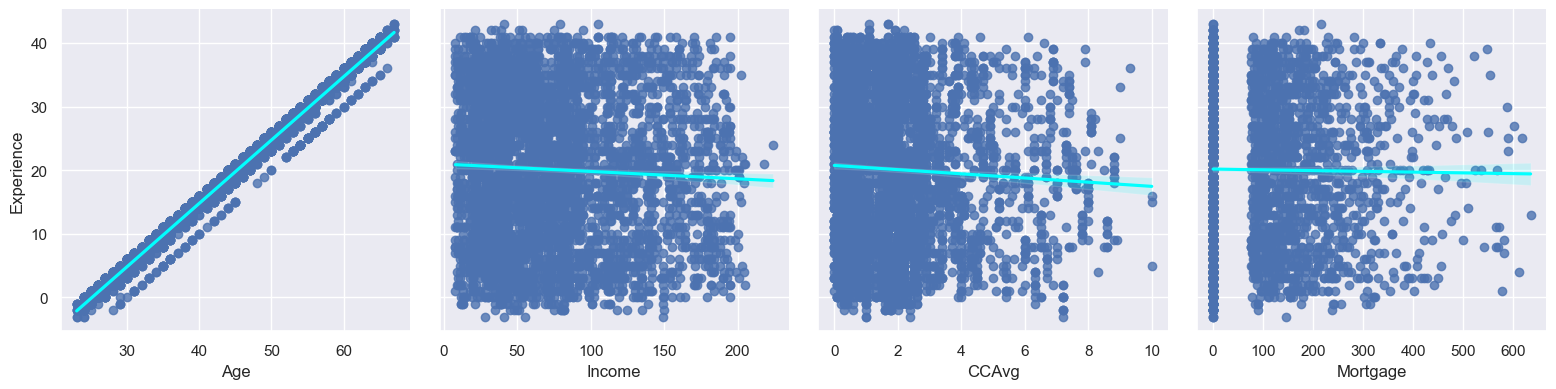

In [14]:
quantitativeAttr = ['Age', 'Income', 'CCAvg', 'Mortgage']
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=data, y_vars='Experience', x_vars=quantitativeAttr, height = 4)
grid.map(sns.regplot, line_kws={"color": "cyan"});

**Observation:**  
From the above plots we can that *Age* has a strong and positive correlation with *Experience.

Also since the *Experience* attribute represents the number of years of professional experience, we can be assured that it has a correlation with the *Education* attribute of the dataset.  
Thus the *Education* attribute along with the *Age* attribute can be used to fix the negative experience error.

Hence in our decision for imputation, we will replace each neagtive *Experience* value the median of positive *Experience* associated with the particular *Age* and *Education* value.

In [15]:
# Create two different dataframes with records where experience value is greater than 0 and lesser than 0 respectively
# Get the list of Customer IDs from the dataframe containing records with negative experince values
# Iterating over the Customer ID list
    # Get the Age and Education level for the corresponding ID from the negative experience dataframe
    # Filter the records form the positive experience dataframe based on the obtained age and education value
        # calculate the median experience value from the filtered dataframe and store in "experience" variable
        # if the filtered dataframe is empty, filter the negative experience dataframe and obtain the median experience value
    # Replace the negative experience with the absolute value of the median "experience" value


df_positive_experience = data[data['Experience'] > 0]
df_negative_experience = data[data['Experience'] < 0]
negative_experience_id_list = df_negative_experience['ID'].tolist()

for id in negative_experience_id_list:
    age = data.loc[np.where(data['ID']==id)]['Age'].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]['Education'].tolist()[0]
    positive_experience_filtered = df_positive_experience[(df_positive_experience['Age'] == age) &
                                                         (df_positive_experience['Education'] == education)]
    if positive_experience_filtered.empty:
        negative_experience_filtered = df_negative_experience[(df_negative_experience['Age'] == age) &
                                                         (df_negative_experience['Education'] == education)]
        experience = round(negative_experience_filtered['Experience'].median())
    else:
        experience = round(positive_experience_filtered['Experience'].median())
    data.loc[data.ID == id, 'Experience'] = abs(experience)

Let's check if there are still any records with negative experience value

In [16]:
data[data['Experience'] < 0]['Experience'].count()

0

In [17]:
data.Experience.describe()

count    5000.000000
mean       20.134800
std        11.414863
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

The minimum value in *Experience* column is 0.00 which was -3.00 before error-fixing.

### 8. Data distribution of all Independent Attributes

#### 8.1 ID

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\2214353446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ID'])


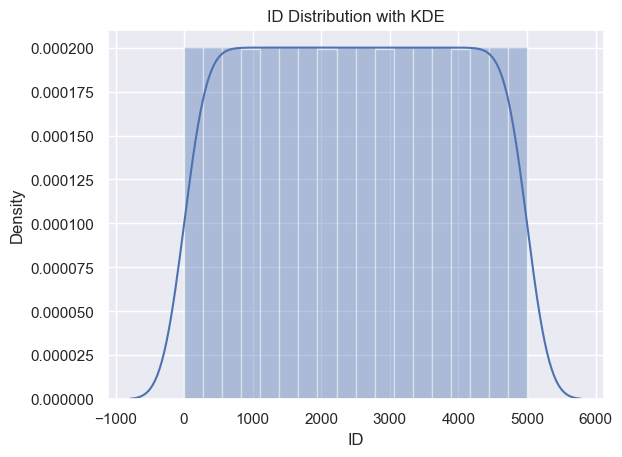

In [18]:
sns.distplot(data['ID'])
plt.title('ID Distribution with KDE');

The data of the *ID* attribute follows a *Uniform Distribution*.

#### 8.2 Age

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\1277952605.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


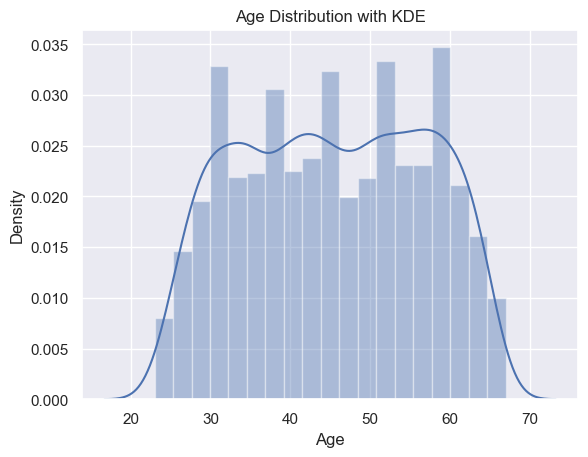

In [19]:
sns.distplot(data['Age'])
plt.title('Age Distribution with KDE');

The above plot shows a frequency distribution superimposed on a histogram for the *Age* attribute.  
This distribution follows a *Normal Distribution*.

#### 8.3 Experience

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\2285573311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Experience'])


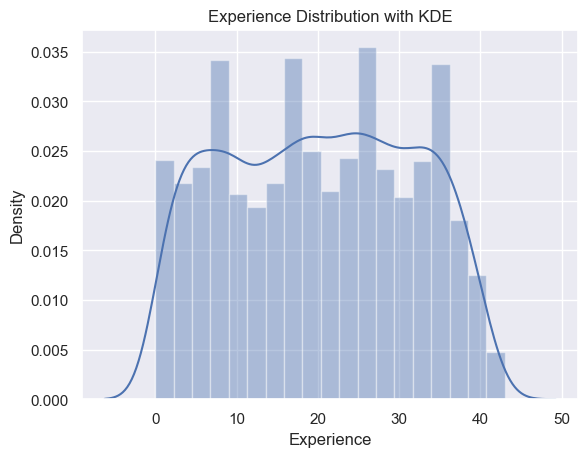

In [20]:
sns.distplot(data['Experience'])
plt.title('Experience Distribution with KDE');

The *Experience* data is also *normally distributed*.

#### 8.4 Income

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\1449691100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'])


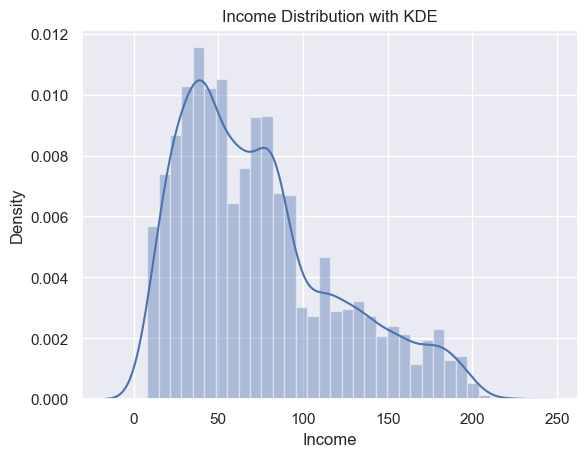

In [21]:
sns.distplot(data['Income'])
plt.title('Income Distribution with KDE');

Skewness score

In [22]:
data['Income'].skew()

0.8413386072610816

The above distribution for the *Income* attribute is positively skewed (right-skewed : tail goes to the right) with a skewness score of 0.8413.

#### 8.5 ZIP Code

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\32856263.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ZIP Code'])


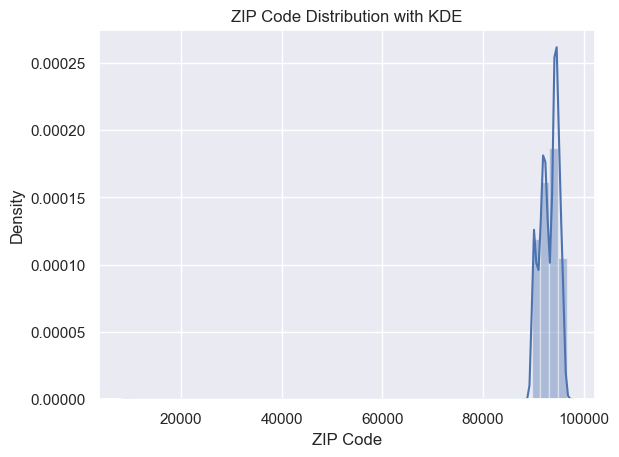

In [23]:
sns.distplot(data['ZIP Code'])
plt.title('ZIP Code Distribution with KDE');

#### 8.6 Family

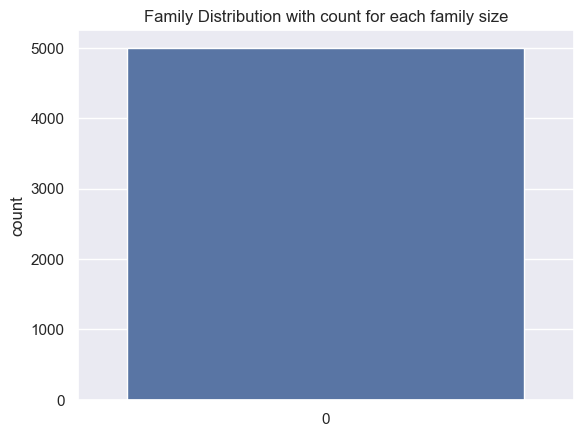

In [24]:
sns.countplot(data['Family'])
plt.title('Family Distribution with count for each family size');

Observations: 
- Most number of customers have family size of one 
- Number of customers with family size of 2 or 4 are almost same
- Customers with family size of 3 are comparatively less

#### 8.7 CCAvg

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\3043544097.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CCAvg'])


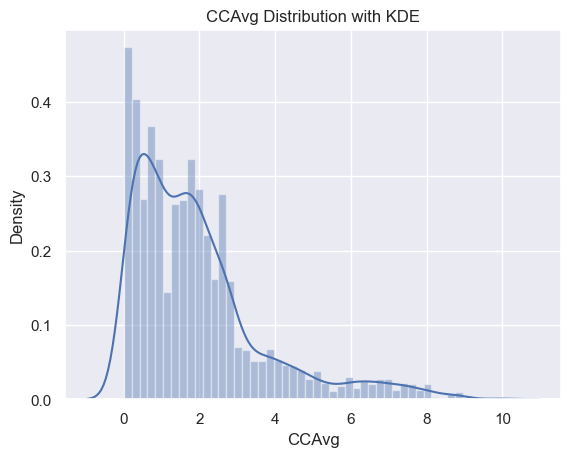

In [25]:
sns.distplot(data['CCAvg'])
plt.title('CCAvg Distribution with KDE');

Skewness score

In [26]:
data['CCAvg'].skew()

1.5984433366678663

The above distribution for the *CCAvg* attribute is highly positively skewed (right-skewed : tail goes to the right) with a skewness score of 1.5984.  

Most of the customers monthly avg. spending on credit cards is between \\$0 to \\$2500. There are very few customers whose monthly avg. spending on credit card is more than \\$8000.

#### 8.8 Education

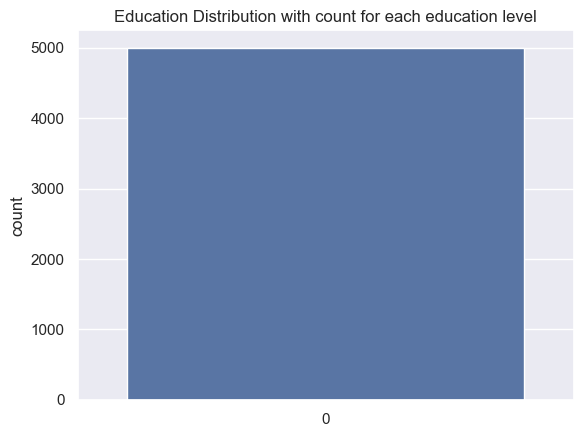

In [27]:
sns.countplot(data['Education'])
plt.title('Education Distribution with count for each education level');

Undergrad level customers are more than the Graduate and Advanced/Professional customers.

#### 8.9 Mortgage

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\3391747907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Mortgage'])


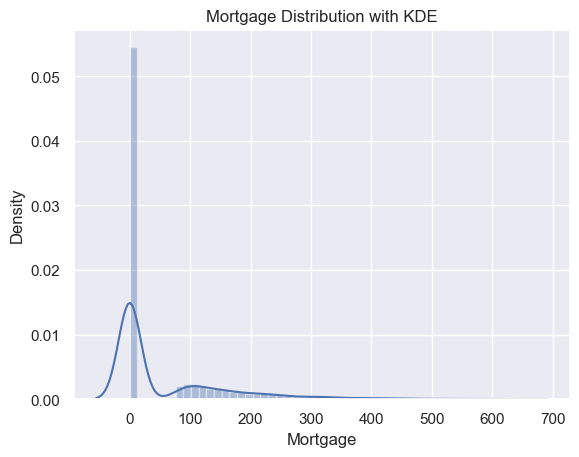

In [28]:
sns.distplot(data['Mortgage'])
plt.title('Mortgage Distribution with KDE');

Skewness score

In [29]:
data['Mortgage'].skew()

2.1040023191079444

The above distribution for the *Mortgage* attribute is highly positively skewed (right-skewed : tail goes to the right) with a skewness score of 2.1040.

Most of the customers do not have any mortgage.   
There are more customers whose mortgage amount is between \\$80000 and \\$150000 whereas there are very few whose mortgage amount is more than \\$600000.

#### 8.10 Securities Account

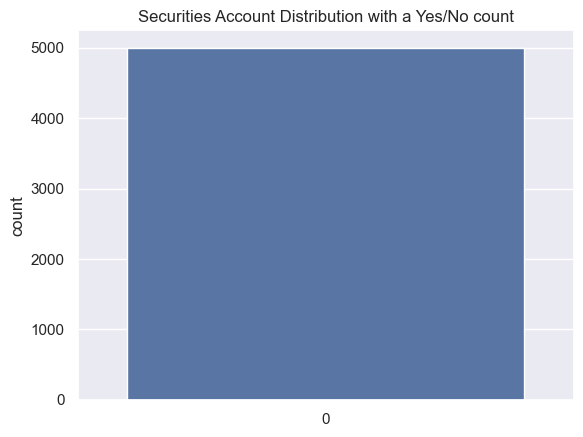

In [30]:
sns.countplot(data['Securities Account'])
plt.title('Securities Account Distribution with a Yes/No count');

Most of the customers do not hold a securities account with the bank as compared to those who do.

#### 8.11 CD Account

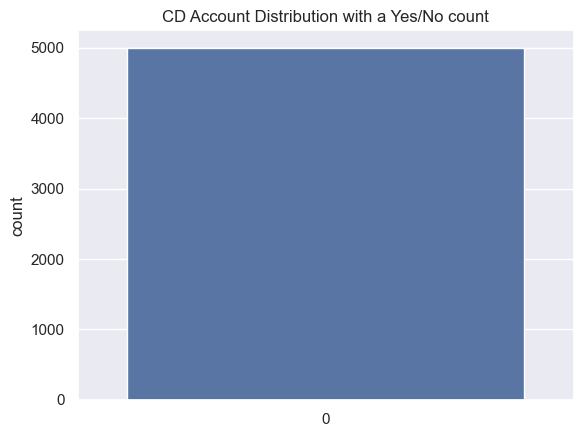

In [31]:
sns.countplot(data['CD Account'])
plt.title('CD Account Distribution with a Yes/No count');

Most of the customers do not hold a CD account with the bank as compared to those who do.

#### 8.12 Online

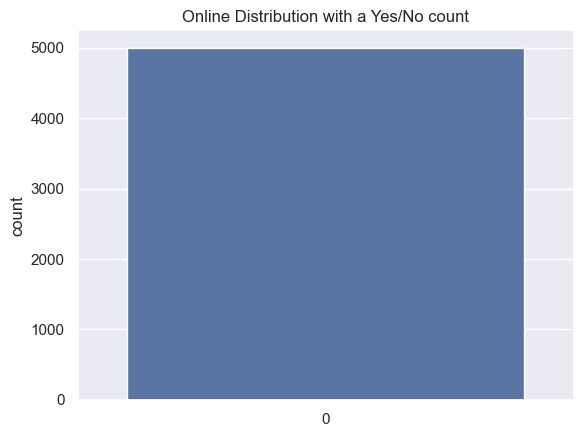

In [32]:
sns.countplot(data['Online'])
plt.title('Online Distribution with a Yes/No count');

Number of customers who use the internet banking facilities provided by the bank is greater than those who do not.

#### 8.13 CreditCard

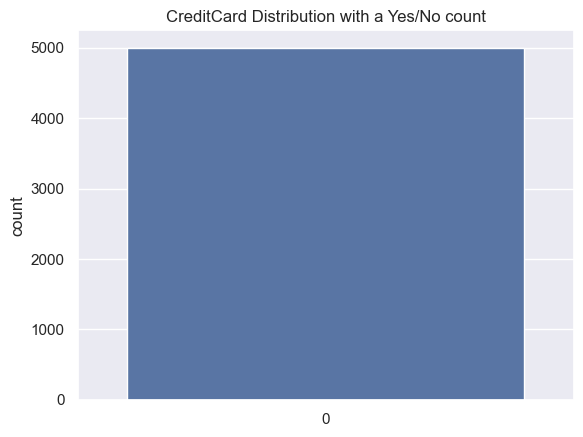

In [33]:
sns.countplot(data['CreditCard'])
plt.title('CreditCard Distribution with a Yes/No count');

Number of customers who do not use a credit card issued by the bank is almost double than those who do.

C:\Users\adity\AppData\Local\Temp\ipykernel_13508\1360016526.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cc);


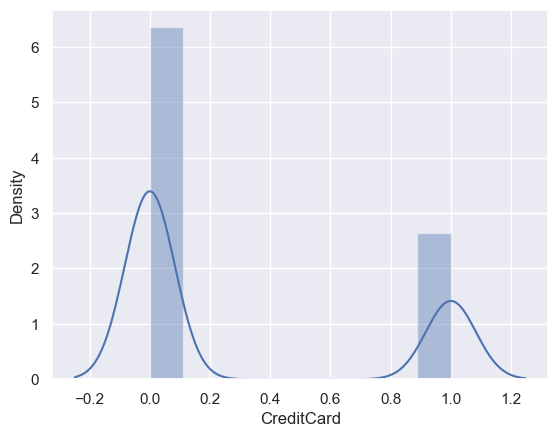

In [34]:
df_cc = data['CreditCard']
df_cc = df_cc.astype({'CreditCard': 'float64'})
sns.distplot(df_cc);

The *CreditCard* column data follows *Bernoulli Distrubution*.  

**Important** : This is the case for all the binary categorical variables in the dataset that can take on exactly two values i.e. 0/1, Yes/No etc..

### 9. Target column (Personal Loan) distribution

Calculate the PL acceptance ratio from the target column

In [35]:
n_true = len(data.loc[data['Personal Loan'] == True])
n_false = len(data.loc[data['Personal Loan'] == False])
print('Number of customers who accepted the PL offer: {0} ({1:2.2f}%)'
      .format(n_true, (n_true / (n_true + n_false)) * 100))
print('Number of customers who did not accept the PL offer: {0} ({1:2.2f}%)'
      .format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customers who accepted the PL offer: 480 (9.60%)
Number of customers who did not accept the PL offer: 4520 (90.40%)


So, we have 9.60% customers in current dataset who accepted the personal loan offer and rest of 90.40% who didn't accept.

In [36]:
loan_acceptance_count = pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
loan_acceptance_count.columns = ['Labels', 'Personal Loan']
loan_acceptance_count

,Labels,Personal Loan
0,0,4520
1,1,480


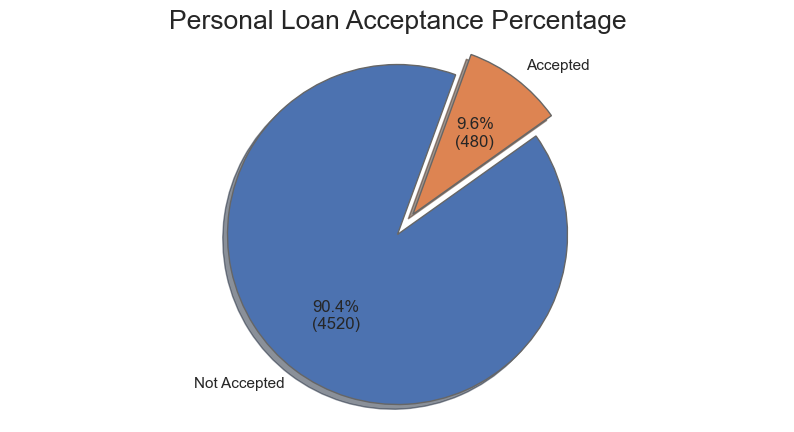

In [37]:
# Creating dataset 
pie_labels = loan_acceptance_count['Labels']
pie_labels = ['Not Accepted' if x == 0 else 'Accepted' for x in pie_labels]
  
pie_data = loan_acceptance_count['Personal Loan'] 

# Creating explode data 
explode = (0, 0.15) 

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : '#666666' }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(np.round(pct / 100.*np.sum(allvalues)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot 
fig, ax = plt.subplots(figsize =(10, 5))

ax.pie(pie_data,  
       autopct = lambda pct: func(pct, pie_data), 
       explode = explode,  
       labels = pie_labels, 
       shadow = True, 
       startangle = 70, 
       wedgeprops = wp)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Personal Loan Acceptance Percentage', size=19)
plt.show();

**Observation:**  
From the above pie chart we can see that the current dataset is hugely biased towards the customers not accepting the personal loan offer.  
Hence we can build an opinion that our model will tend to perform better towards predicting which customers will not accept the personal loan. However, our goal is to identify the customer who can accept the personal loan based on the given features.

### 10. Identify correlation in data

#### 10.1 PairPlot to get a visual sense of correlation between the target and independent attributes of the dataset. Also amongst each independent attribute.

Note: *ID* is not considered in the plot as it is just for record index.

C:\Users\adity\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


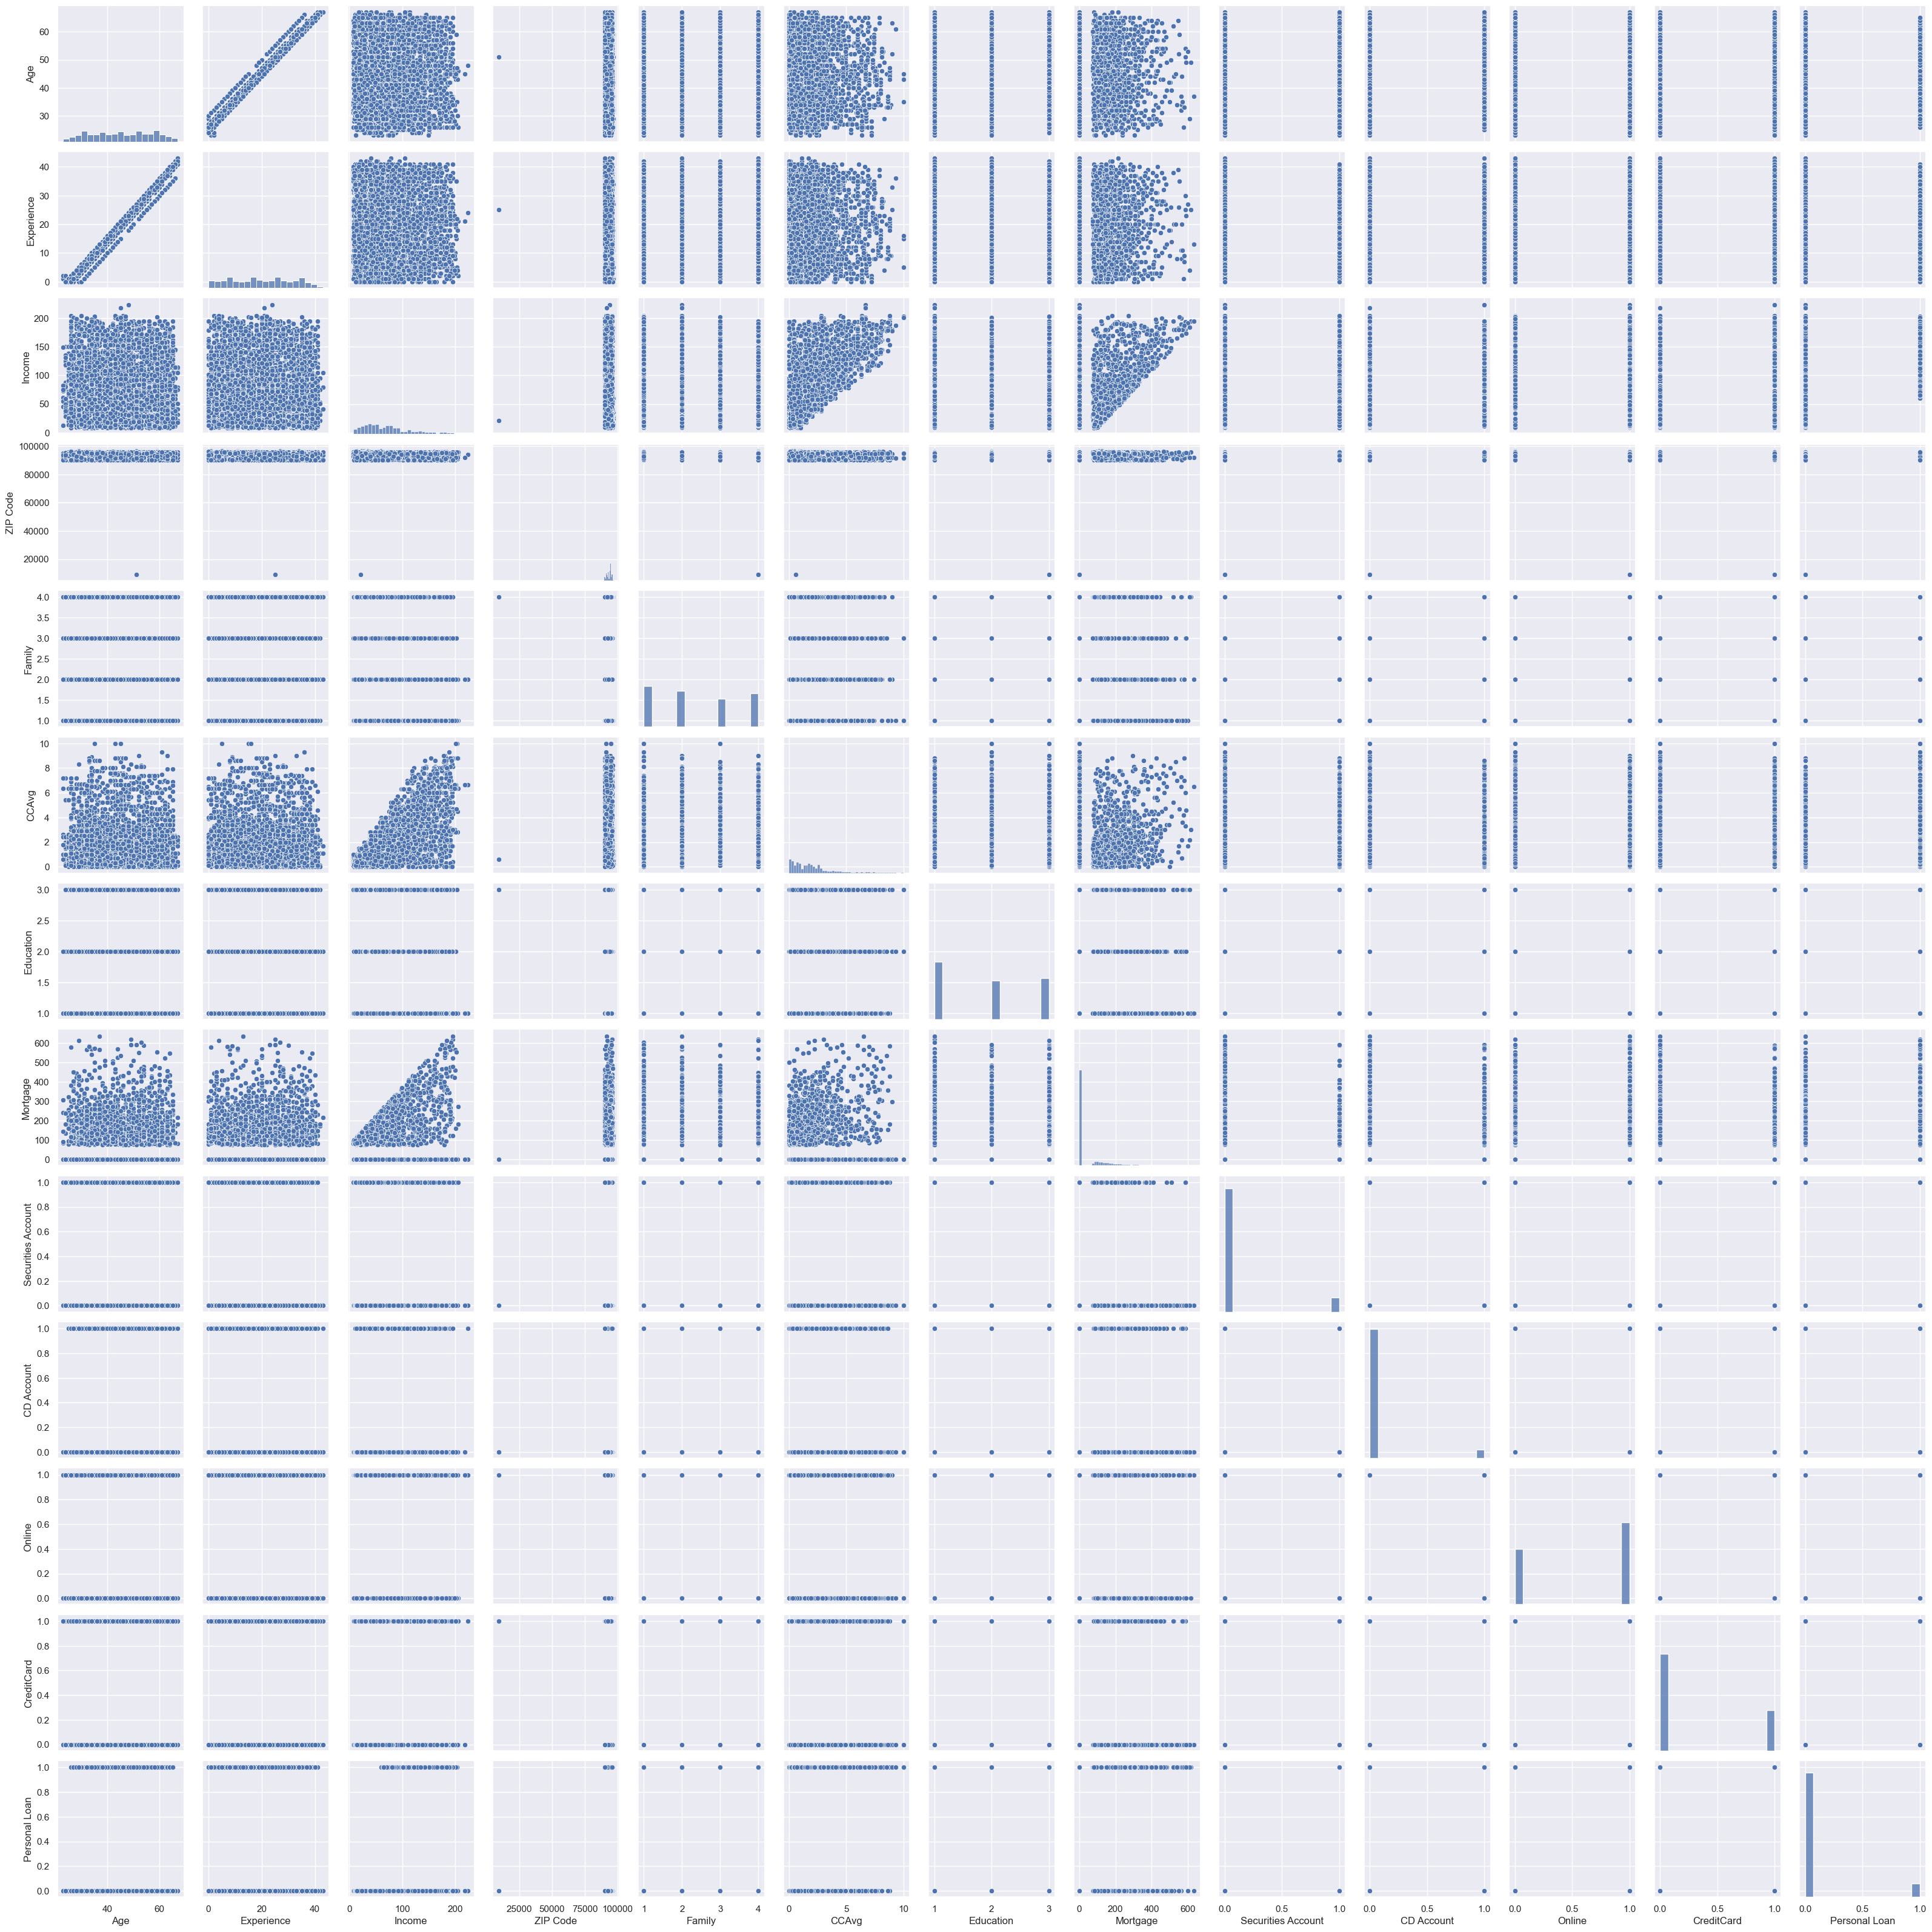

In [38]:
sns.pairplot(data.iloc[:,1:]);

**Observation:**  
- There is no clear relationship between the ZIP Code and other variables.
- There is a strong and linear relationship between the *Age* and *Experience* attribute. (As we have already discussed in the     above as sections well)
- *Income* and *CCAvg* attributes are moderately correlated.
- Similarly, *Income* and *Mortgage* are also moderately correlated.


#### 10.2 Compute pairwise correlation of columns

The scatter plot only offers visual representation of the degree of correlation between two variables. 

In order to obtain more precise information about the correlation of the two variables, we can use the *Pandas* **.corr()** function. This returns a table with all the correlations calculated for the numerical columns, excluding NA/null values.

In [39]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
ID,1.000000,-0.008473,-0.008262,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.016972,-0.006909,-0.002528,0.017028,-0.024801
Age,-0.008473,1.000000,0.994042,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.000436,0.008043,0.013702,0.007681,-0.007726
Experience,-0.008262,0.994042,1.000000,-0.046912,-0.028863,-0.051950,-0.049856,0.014026,-0.011117,-0.001052,0.009731,0.013923,0.008994,-0.008310
Income,-0.017695,-0.055269,-0.046912,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,-0.002616,0.169738,0.014206,-0.002385,0.502462
ZIP Code,0.013432,-0.029216,-0.028863,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.004704,0.019972,0.016990,0.007691,0.000107
Family,-0.016797,-0.046418,-0.051950,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.019994,0.014110,0.010354,0.011588,0.061367
CCAvg,-0.024675,-0.052012,-0.049856,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.015086,0.136534,-0.003611,-0.006689,0.366889
Education,0.021463,0.041334,0.014026,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,-0.010812,0.013934,-0.015004,-0.011014,0.136722
Mortgage,-0.013920,-0.012539,-0.011117,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,-0.005411,0.089311,-0.005995,-0.007231,0.142095
Securities Account,-0.016972,-0.000436,-0.001052,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,1.000000,0.317034,0.012627,-0.015028,0.021954


The same can be represented graphically using the **heatmap** function in *Seaborn* package.

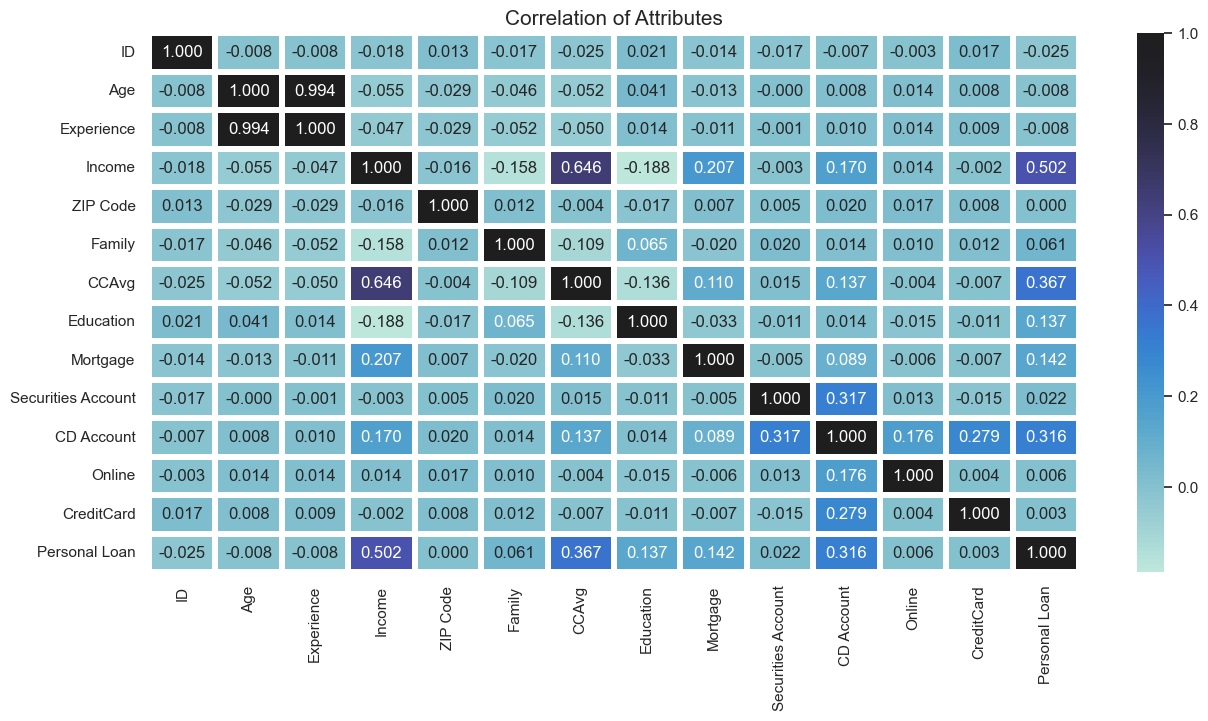

In [40]:
plt.figure(figsize=(15,7))
plt.title('Correlation of Attributes', size=15)
sns.heatmap(data.corr(), annot=True, linewidths=3, fmt='.3f', center=1);

**Observation:**
- The highest correlation of almost 1 is between *Age* and *Experience*
- *CCAvg* and *Income* have a moderate correlation of value 0.65
- The attributes 
    - *Mortgage* & *Income*, and
    - *Securities Account* & *CD Account*  
  are moderately correlated
- *Income* influences *CCAvg*, *Mortgage*, *CD Account* and *Personal Loan*
- There is also evident association of *CD Account* with *Income*, *CCAvg*, *Securities Account*, *Online* and *Credit Card* 
- The target attribute i.e *Personal Loan* has maximum correlation with *Income*, *CCAvg*, *Education*, *Mortgage* and *CD       Account*

#### 10.3 Let's see few of the above discussed correlations of the target variable, Personal Loan with other variables individually             with *Multivariate Analysis*

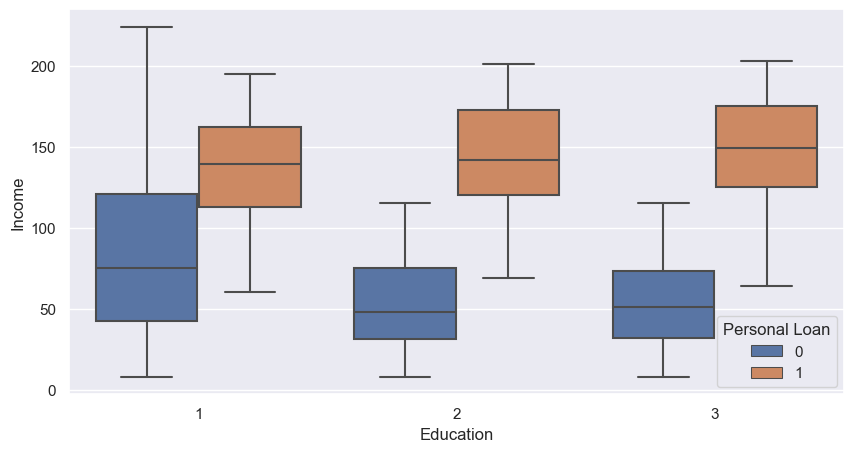

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Income', hue='Personal Loan', data=data);

Observation:  
- Customers who took loan have same range of income irrespective of education level.
- Customers with education level of graduate and advanced/professional have higher chances of taking a loan.

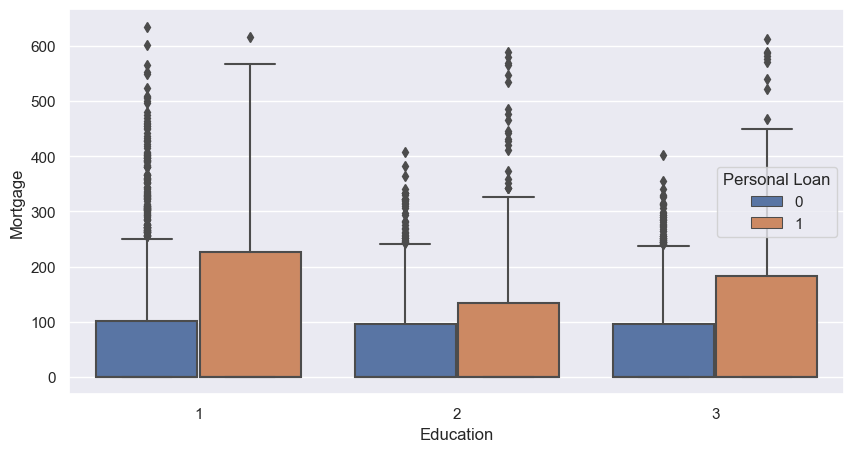

In [42]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education', y='Mortgage', hue='Personal Loan', data=data);

Observation:
- Customers of any education level but with high value of house mortgage, have higher chances of taking a loan compared to those of the same education level but with low house mortagage value.

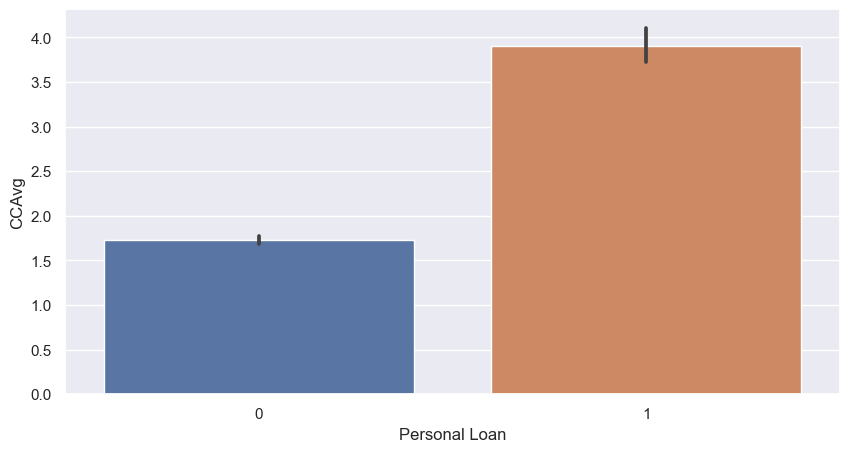

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x='Personal Loan', y='CCAvg', data=data);

Observation:
- Customers with high monthly average spending on credit cards are more likely to take a loan.

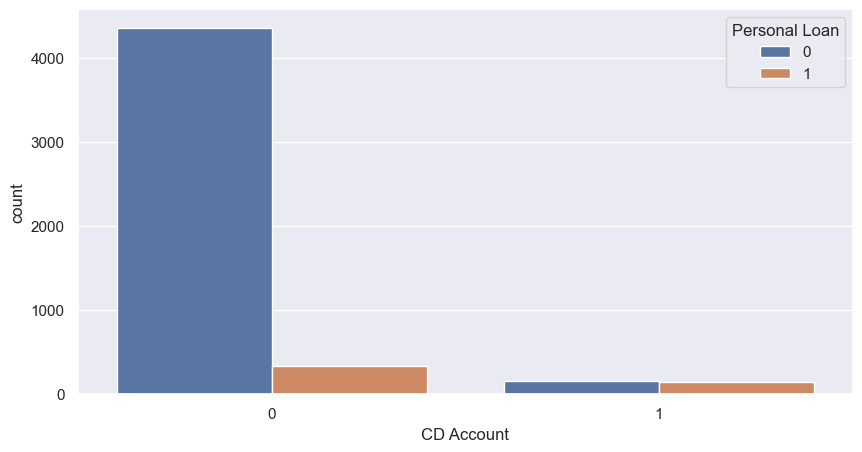

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='CD Account', data=data, hue='Personal Loan');

Observation:
- Customers who do not have a CD Account with the bank, do not have loan as well. This seems to be the majority.
- Also, almost all customers who have a CD Account with the bank, have taken the loan as well.

## Model Building

___

### 11. Data preparation

As we have seen from the EDA, *ID* and *ZIP Code* attributes are not relevant for our model building so we will drop it.

In [45]:
# Make a copy of dataset before doing any changes to the original data
modelData = data.copy()

In [46]:
modelData.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

### 12. Splitting the data

We will use 70% of data for training and 30% for testing

In [47]:
X = modelData.drop(['Personal Loan'], axis=1)    # Predictor(Independent) Feature columns
y = modelData['Personal Loan']                   # Target Feature column

Note:
- Uppercase "X" stands for that each row in this set contains more than one value (contains a vector),
- Similarly, the smallcase "y" tells that each row contains only single value.

Sometimes it is good to differentiate in this way

In [48]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)    # 1 is just any random seed number

In [49]:
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


### 13. Logistic Regression

#### 13.1 Create a Logistic Regression model

In [50]:
LRM = LogisticRegression(solver='liblinear')

#### 13.2 Fit the model on training set

In [51]:
LRM.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### 13.3 Print the Coefficients

In [52]:
coeff_df = pd.DataFrame(LRM.coef_)
coeff_df['Intercept'] = LRM.intercept_
print(coeff_df)

          0         1         2         3         4        5         6  \
0 -0.403075  0.403285  0.048778  0.637512  0.162886  1.63271  0.000785   

          7         8         9        10  Intercept  
0 -0.864589  3.260876 -0.591426 -1.017309  -2.371466  


#### 13.4 Performance of the Logistic Regression Model with training set

In [53]:
logistic_training_predict = LRM.predict(X_train)

print('Logistic Regression Model In-Sample (Training Set) Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, 
                                                                                            logistic_training_predict)))
print('')

Logistic Regression Model In-Sample (Training Set) Accuracy: 0.9517



#### 13.5 Performance of the Logistic Regression Model with test set

In [54]:
logistic_test_predict = LRM.predict(X_test)

LRM_accuracy = metrics.accuracy_score(y_test, logistic_test_predict)

print('Logistic Regression Model Out-Sample (Test Set) Accuracy: {0:.4f}'.format(LRM_accuracy))
print('')

Logistic Regression Model Out-Sample (Test Set) Accuracy: 0.9460



94% (approx.) of the times the model prediction was right and 6% (approx.) of the times the prediction was not right.

**As a machine learner, we are more concerned about the score of the test set.**

**Logistic Regression Model Accuracy is 94%.**

#### 13.6 Confusion Matrix

Confusion Matrix for Actual v/s Predicted values

In [55]:
logistic_cm = metrics.confusion_matrix(y_test, logistic_test_predict, labels=[1,0])
print(logistic_cm)

[[  84   65]
 [  16 1335]]


Represent the Confusion Matrix using Seaborn's visualization

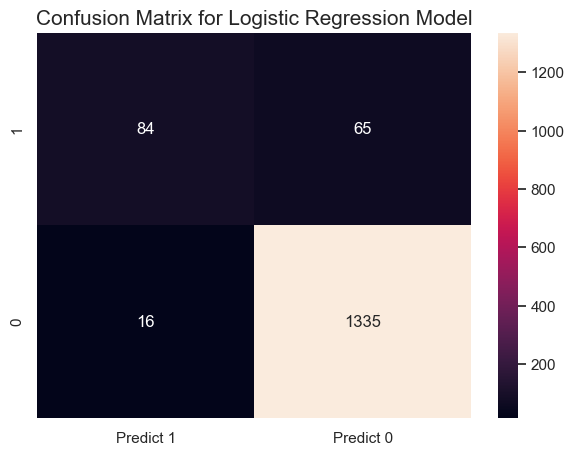

In [56]:
logistic_cm_df = pd.DataFrame(logistic_cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Logistic Regression Model', size=15)
sns.heatmap(logistic_cm_df, annot=True, fmt='g'); # fmt='g' (format) is used to get rid of scientific formats

**Logistic Regression Model Confusion Matrix:**
* *True Positives* (TP): We correctly predicted that customers have accepted the personal loan offer $=$ 84
* *True Negatives* (TN): We correctly predicted that customers have not accepted the personal loan offer $=$ 1335
* *False Positives* (FP): We incorrectly predicted that customers have accepted the personal loan offer (a "Type I error") $=$ 16
* *False Negatives* (FN): We incorrectly predicted that customers have not accepted the personal loan offer (a "Type II error") $=$ 65

#### 13.7 Classification Report

In [57]:
print('Logistic Regression Model - Classification Report')
print('')
print(metrics.classification_report(y_test, logistic_test_predict, labels=[1,0]))

Logistic Regression Model - Classification Report

              precision    recall  f1-score   support

           1       0.84      0.56      0.67       149
           0       0.95      0.99      0.97      1351

    accuracy                           0.95      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.95      0.94      1500



### 14. Naive Bayes

#### 14.1 Create a Guassian Naive Bayes model

In [58]:
GNBM = GaussianNB()

#### 14.2 Fit the model on training set

In [59]:
GNBM.fit(X_train, y_train)

GaussianNB()

#### 14.3  Performance of the Naive Bayes Model with training set

In [60]:
nB_training_predict = GNBM.predict(X_train)

print('Naive Bayes Model In-Sample (Training Set) Accuracy: {0:.4f}'.format(metrics.accuracy_score(y_train, 
                                                                                            nB_training_predict)))
print('')

Naive Bayes Model In-Sample (Training Set) Accuracy: 0.8900



#### 14.4 Performance of the Naive Bayes Model with test set

In [61]:
nB_test_predict = GNBM.predict(X_test)

GNBM_accuracy = metrics.accuracy_score(y_test, nB_test_predict)

print('Naive Bayes Model Out-Sample (Test Set) Accuracy: {0:.4f}'.format(GNBM_accuracy))
print('')

Naive Bayes Model Out-Sample (Test Set) Accuracy: 0.8747



87% (approx.) of the times the Naive Bayes model prediction was right and 13% (approx.) of the times the prediction was not right.

**Naive Bayes Model Accuracy is 87%.**

#### 14.5 Confusion Matrix

In [62]:
nB_cm = metrics.confusion_matrix(y_test, nB_test_predict, labels=[1,0])
print(nB_cm)

[[  84   65]
 [ 123 1228]]


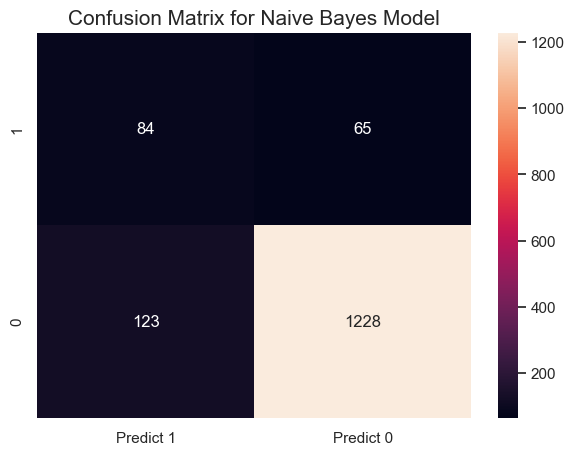

In [63]:
nB_cm_df = pd.DataFrame(nB_cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for Naive Bayes Model', size=15)
sns.heatmap(nB_cm_df, annot=True, fmt='g');

**Naive Bayes Model Confusion Matrix:**
* True Positives (TP) $=$ 84
* True Negatives (TN) $=$ 1228
* False Positives (FP), Type I Error $=$ 123
* False Negatives (FN), Type II Error $=$ 65

#### 14.6 Classification Report

In [64]:
print('Naive Bayes Model - Classification Report')
print('')
print(metrics.classification_report(y_test, nB_test_predict, labels=[1,0]))

Naive Bayes Model - Classification Report

              precision    recall  f1-score   support

           1       0.41      0.56      0.47       149
           0       0.95      0.91      0.93      1351

    accuracy                           0.87      1500
   macro avg       0.68      0.74      0.70      1500
weighted avg       0.90      0.87      0.88      1500



### 15. K-Nearest Neighbors

#### 15.1 Normalize the data

Since we use distance calculations in the kNN algorithm, it is important to scale the columns to make them comparable to one another.

So, we convert the features into z scores as we do not know what units / scales were used and store them in new dataframe.

In [65]:
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)

In [66]:
X_train_scaled.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,-2.050423e-16,1.461688e-16,-8.628019e-18,1.565732e-16,-4.567775e-18,-1.075965e-16,-7.714464e-17,4.263256e-17,1.065814e-17,-1.083578e-16,-2.842171e-17
std,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,-1.949859e+00,-1.766660e+00,-1.421959e+00,-1.217944e+00,-1.115222e+00,-1.055713e+00,-5.577066e-01,-3.417362e-01,-2.583562e-01,-1.202432e+00,-6.506480e-01
25%,-9.069414e-01,-8.936563e-01,-7.504064e-01,-1.217944e+00,-7.116377e-01,-1.055713e+00,-5.577066e-01,-3.417362e-01,-2.583562e-01,-1.202432e+00,-6.506480e-01
50%,-3.784303e-02,-2.065277e-02,-2.304943e-01,-3.449552e-01,-2.503985e-01,1.354526e-01,-5.577066e-01,-3.417362e-01,-2.583562e-01,8.316480e-01,-6.506480e-01
75%,8.312553e-01,8.523508e-01,5.277107e-01,5.280334e-01,3.261505e-01,1.326618e+00,4.397107e-01,-3.417362e-01,-2.583562e-01,8.316480e-01,1.536929e+00
max,1.874173e+00,1.987255e+00,3.257249e+00,1.401022e+00,4.650268e+00,1.326618e+00,5.581012e+00,2.926233e+00,3.870625e+00,8.316480e-01,1.536929e+00


As we can see from the above table, the mean of all attributes have been adjusted to 0 and standard deviations have been brought to 1.

#### 15.2 Create a kNN model

In [67]:
kNNM = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

#### 15.3 Fit the model on training set

In [68]:
kNNM.fit(X_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

#### 15.4 Performance of the kNN Model

In [69]:
kNN_test_predict = kNNM.predict(X_test_scaled)

print('kNN Model Accuracy with k = 5: {0:.4f}'.format(metrics.accuracy_score(y_test, kNN_test_predict)))
print('')

kNN Model Accuracy with k = 5: 0.9533



#### 15.5 Choosing the optimal value of k

The k value must be an odd number.

Choose the k value having a minimum misclassification rate.

Misclassification Rate (%): The percentage of incorrectly classified instances are nothing, but the misclassification rate of the classifier and can be calculated as
$$Misclassification Rate = \frac{False Positives + False Negatives}{Total Instances}$$

Minimum error:- 0.04133333333333333 at k = 3


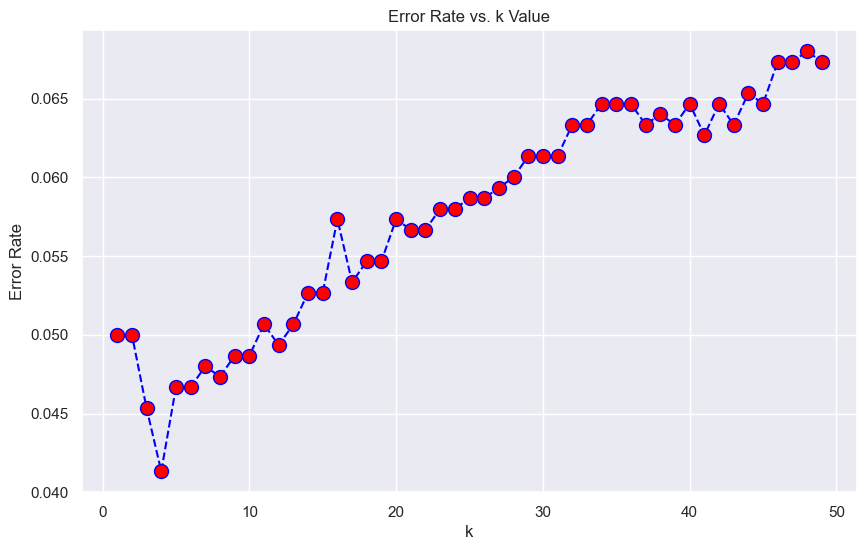

In [70]:
error_rate = []
for k in range(1,50):
 kNN_k_test = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
 kNN_k_test.fit(X_train_scaled,y_train)
 pred_k = kNN_k_test.predict(X_test_scaled)
 error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at k =",error_rate.index(min(error_rate)))

From the plot, we can see that the smallest error we got is 0.04133 at k $=$ 3. 

Further on, we will visualize the plot between accuracy and k value.

Maximum accuracy:- 0.9586666666666667 at k = 3


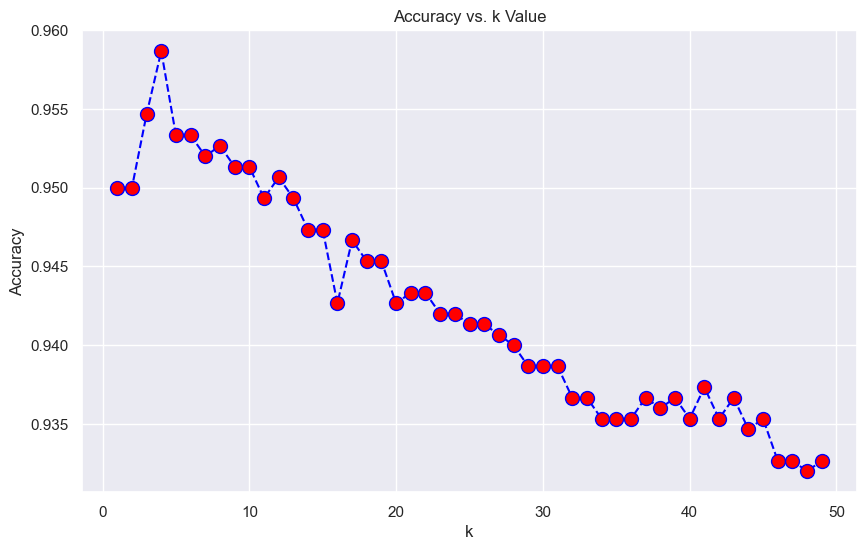

In [71]:
acc = []
for k in range(1,50):
    kNN_acc_test = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    kNN_acc_test.fit(X_train_scaled,y_train)
    pred_acc = kNN_acc_test.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(y_test, pred_acc))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at k =",acc.index(max(acc)))

We got the maximum accuracy (0.9586) and minimum error rate (0.0413) at **k $=$ 3**.  
Hence we can say that we will get better efficiency at this k value.

In [72]:
optimal_k = 3
kNNM_optimal = KNeighborsClassifier(n_neighbors = optimal_k, weights = 'distance')
kNNM_optimal.fit(X_train_scaled, y_train)
kNN_test_predict_optimal = kNNM_optimal.predict(X_test_scaled)
kNNM_accuracy = metrics.accuracy_score(y_test, kNN_test_predict_optimal)

print('kNN Model Accuracy with k ={0:2d} :- {1:.4f}'.format(optimal_k, kNNM_accuracy))
print('')

kNN Model Accuracy with k = 3 :- 0.9547



**kNN Model Accuracy is 95%.**

#### 15.6 Confusion Matrix

In [73]:
kNN_cm = metrics.confusion_matrix(y_test, kNN_test_predict_optimal, labels=[1,0])
print(kNN_cm)

[[  91   58]
 [  10 1341]]


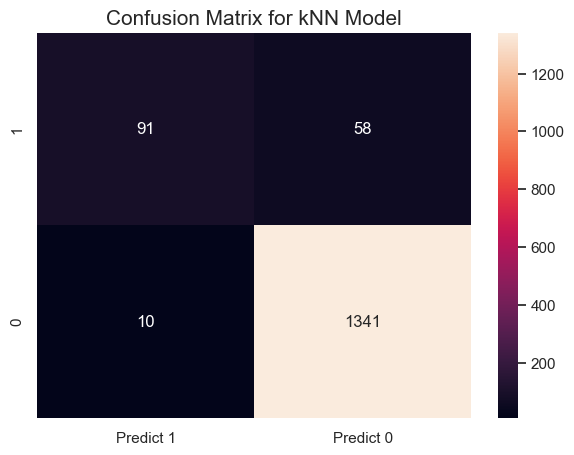

In [74]:
kNN_cm_df = pd.DataFrame(kNN_cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for kNN Model', size=15)
sns.heatmap(kNN_cm_df, annot=True, fmt='g');

**kNN Model Confusion Matrix:**
* True Positives (TP) $=$ 91
* True Negatives (TN) $=$ 1341
* False Positives (FP), Type I Error $=$ 10
* False Negatives (FN), Type II Error $=$ 58

#### 15.7 Classification Report

In [75]:
print('kNN Model - Classification Report')
print('')
print(metrics.classification_report(y_test, kNN_test_predict_optimal, labels=[1,0]))

kNN Model - Classification Report

              precision    recall  f1-score   support

           1       0.90      0.61      0.73       149
           0       0.96      0.99      0.98      1351

    accuracy                           0.95      1500
   macro avg       0.93      0.80      0.85      1500
weighted avg       0.95      0.95      0.95      1500



### 16. Support Vector Machines

#### 16.1 Create a SVM model

In [76]:
SVCM = SVC(gamma=0.025, C=3)

*gamma* is a measure of influence of a data point. It is inverse of distance of influence.  
*C* is complexity of the model, lower C value creates simple hyperplane surfaces while higher C value creates complex surafce.

#### 16.2 Fit the model on training set

In [77]:
SVCM.fit(X_train, y_train)

SVC(C=3, gamma=0.025)

#### 16.3 Performance of the SVC Model

In [78]:
svc_test_predict = SVCM.predict(X_test)

SVCM_accuracy = metrics.accuracy_score(y_test, svc_test_predict)

print('SVC Model Accuracy: {0:.4f}'.format(SVCM_accuracy))
print('')

SVC Model Accuracy: 0.9273



**SVC Model Accuracy is 92%.**

#### 16.4 Confusion Matrix

In [79]:
svc_cm = metrics.confusion_matrix(y_test, svc_test_predict, labels=[1,0])
print(svc_cm)

[[  51   98]
 [  11 1340]]


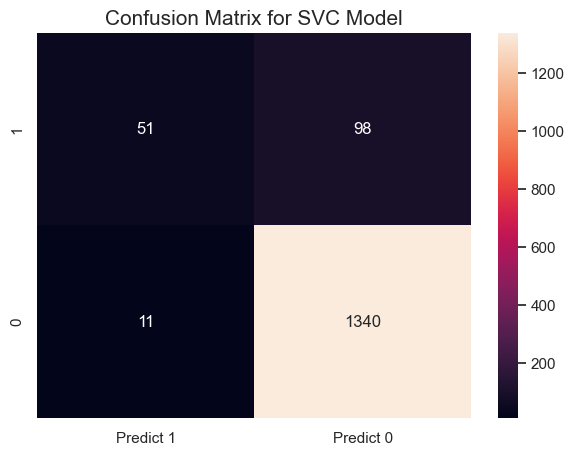

In [80]:
svc_cm_df = pd.DataFrame(svc_cm, index = [i for i in ["1","0"]], columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize=(7,5))
plt.title('Confusion Matrix for SVC Model', size=15)
sns.heatmap(svc_cm_df, annot=True, fmt='g');

**SVC Model Confusion Matrix:**
* True Positives (TP) $=$ 51
* True Negatives (TN) $=$ 1340
* False Positives (FP), Type I Error $=$ 11
* False Negatives (FN), Type II Error $=$ 98

#### 16.5 Classification Report

In [81]:
print('SVC Model - Classification Report')
print('')
print(metrics.classification_report(y_test, svc_test_predict, labels=[1,0]))

SVC Model - Classification Report

              precision    recall  f1-score   support

           1       0.82      0.34      0.48       149
           0       0.93      0.99      0.96      1351

    accuracy                           0.93      1500
   macro avg       0.88      0.67      0.72      1500
weighted avg       0.92      0.93      0.91      1500



## Comparison Of Models

___

In [82]:
models = ['Naive Bayes', 'SVM']
model_accuracy_scores = [GNBM_accuracy, SVCM_accuracy]
comp_df = pd.DataFrame([model_accuracy_scores], index=['Accuracy'], columns=models)
comp_df

,Naive Bayes,SVM
Accuracy,0.874667,0.927333
